# (1) Data Understanding

In [25]:
import pandas as pd

In [26]:
#importing data
df = pd.read_csv('realtor-data.csv')

In [27]:
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [28]:
#checking data size
import numpy as np

df.shape

(923159, 12)

In [29]:
df.dtypes

status           object
price           float64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code        float64
house_size      float64
sold_date        object
dtype: object

In [30]:
# Change from object to datetime
df['sold_date'] = pd.to_datetime(df['sold_date'])

In [31]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,9.230880e+05,791456.000000,807967.000000,649536.000000,922954.000000,6.253160e+05
mean,8.841225e+05,3.330352,2.488164,17.075888,6590.061523,2.141644e+03
std,2.623745e+06,2.070402,1.940057,962.322866,3818.208203,3.035327e+03
min,0.000000e+00,1.000000,1.000000,0.000000,601.000000,1.000000e+02
25%,2.690000e+05,2.000000,1.000000,0.110000,2919.000000,1.130000e+03
50%,4.750000e+05,3.000000,2.000000,0.290000,7004.000000,1.651000e+03
75%,8.399000e+05,4.000000,3.000000,1.150000,10001.000000,2.499000e+03
max,8.750000e+08,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06


In [32]:
df.isnull().sum()

status               0
price               71
bed             131703
bath            115192
acre_lot        273623
full_address         0
street            2138
city                74
state                0
zip_code           205
house_size      297843
sold_date       466763
dtype: int64

In [33]:
# check the percentage of null rows by columns
null_cols = df.isnull().sum() / df.shape[0] * 100
print(null_cols)

status           0.000000
price            0.007691
bed             14.266556
bath            12.478024
acre_lot        29.639856
full_address     0.000000
street           0.231596
city             0.008016
state            0.000000
zip_code         0.022206
house_size      32.263456
sold_date       50.561496
dtype: float64


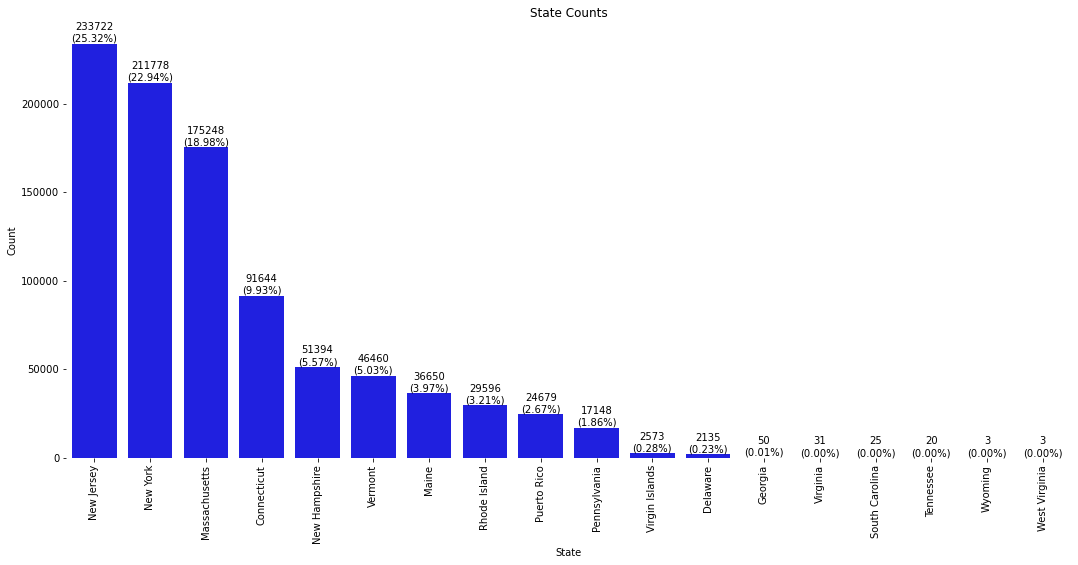

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# get the count of each state

state_counts = df['state'].value_counts()
total = len(df)

# create the count plot
plt.figure(figsize=(18,8))
ax = sns.countplot(x='state', data=df, order=state_counts.index, color="blue")

# add title and labels
plt.title("State Counts")
plt.xlabel("State")
plt.ylabel("Count")

# rotate x labels

plt.xticks(rotation=90)

# add labels with count and percentage of total for each state
for i, state in enumerate(ax.get_xticklabels()):
    count = state_counts[state.get_text()]
    percent = (count/total)*100
    ax.annotate('{}\n({:.2f}%)'.format(count, percent), (i, count), ha='center', va='bottom', fontsize=10)

# remove border line

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
    
    
plt.show()

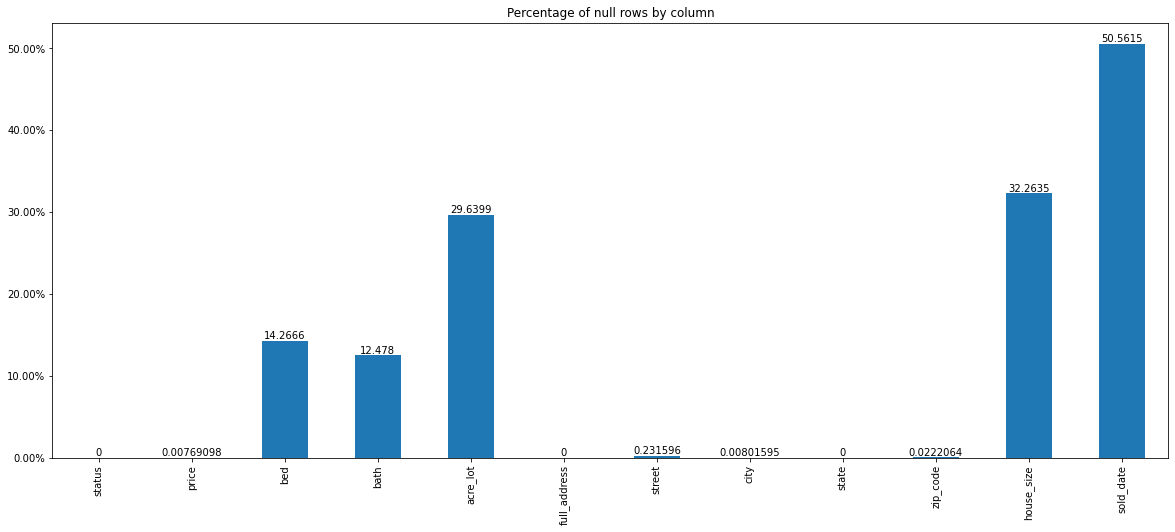

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
# set the y-axis to display only two decimal places
ax = null_cols.plot.bar(figsize=(20,8), title='Percentage of null rows by column')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2f}%'.format(y)))

# add the labels with the percentage values to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)
plt.show()

# (2) Data Preparation

In [36]:
#replace missing values with 0

df['price'].fillna(value=0, inplace=True)
df['acre_lot'].fillna(value=0, inplace=True)

In [37]:
df.isnull().sum()

status               0
price                0
bed             131703
bath            115192
acre_lot             0
full_address         0
street            2138
city                74
state                0
zip_code           205
house_size      297843
sold_date       466763
dtype: int64

In [38]:
#Convert sold date to datetype
df["sold_date"]=pd.to_datetime(df["sold_date"])


In [39]:
df["year"] = df["sold_date"].dt.year

# (3) Data Visualization

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Checking correlations
correlation = df.corr()

<AxesSubplot:>

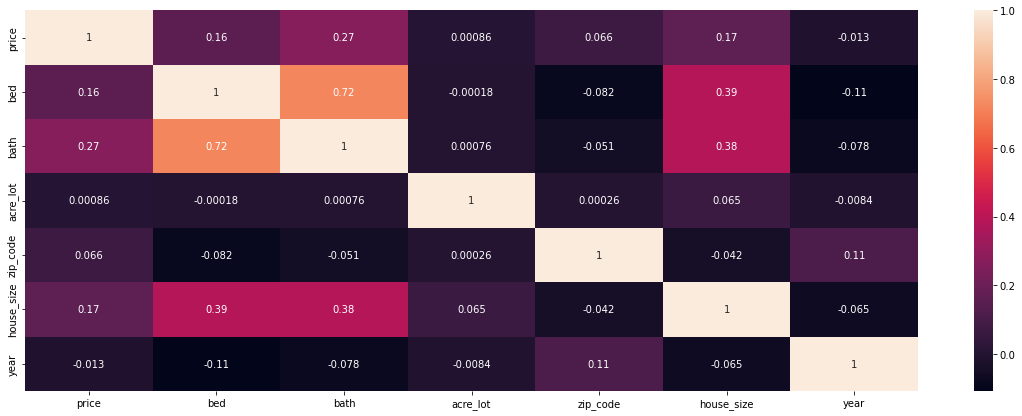

In [42]:
# correlation plot
%matplotlib inline
plt.figure(figsize=(20,7))
sns.heatmap(correlation,annot=True)

In [43]:
dep_var = 'price'
indep_vars = ['zip_code','bed','bath','house_size']
correlation.loc[indep_vars, dep_var]

zip_code      0.066393
bed           0.158269
bath          0.266626
house_size    0.165209
Name: price, dtype: float64

# Modelling New York City

In [44]:
#Create a datasaet for new york state
df_ny = df.loc[df['state'] == 'New York']

In [68]:
#Checking Cities from NY

city_agg = df_ny.groupby("city").agg({
    'price':'count'
})

print(city_agg.sort_values(by=city_agg.columns[0], ascending=False))

               price
city                
New York City  18780
New York       17887
Brooklyn       10612
Bronx           6407
Staten Island   4876
...              ...
Setauket           1
Wakefield          1
East Marion        1
Sea Cliff          1
Riverhead          1

[367 rows x 1 columns]


In [69]:
df_ny.loc[df['city'] == "New York City", 'city'] = "New York"

In [71]:
#Create a datasaet for new york city
df_ny = df.loc[df['city'] == 'New York']

In [72]:
df_ny.head(5)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,year
465089,for_sale,1185000.0,2.0,2.0,0.0,"175 E 74th St Apt 7C, New York, NY, 10021",175 E 74th St Apt 7C,New York,New York,10021.0,NaN,NaT,NaN
465111,for_sale,29995000.0,12.0,14.0,0.0,"271 W 11th St, New York, NY, 10014",271 W 11th St,New York,New York,10014.0,8528.0,NaT,NaN
465513,for_sale,895000.0,2.0,2.0,0.0,"440 E 56th St Unit 4G, New York, NY, 10022",440 E 56th St Unit 4G,New York,New York,10022.0,1425.0,NaT,NaN
465515,for_sale,985000.0,1.0,2.0,0.0,"55 Wall St Apt 626, New York, NY, 10005",55 Wall St Apt 626,New York,New York,10005.0,1166.0,2014-01-10,2014.0
465516,for_sale,810000.0,1.0,1.0,0.0,"304 E 65th St Apt 3C, New York, NY, 10065",304 E 65th St Apt 3C,New York,New York,10065.0,761.0,2020-08-18,2020.0


In [73]:
#Create Column if sold ==1 not sold ==0

df_ny['sold'] = df_ny['sold_date'].apply(lambda x: 0 if pd.isnull(x) else 1)

# print result

df_ny.head()

C:\Users\RAMOUTINHO\AppData\Local\Temp\ipykernel_24648\144917819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ny['sold'] = df_ny['sold_date'].apply(lambda x: 0 if pd.isnull(x) else 1)


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,year,sold
465089,for_sale,1185000.0,2.0,2.0,0.0,"175 E 74th St Apt 7C, New York, NY, 10021",175 E 74th St Apt 7C,New York,New York,10021.0,NaN,NaT,NaN,0
465111,for_sale,29995000.0,12.0,14.0,0.0,"271 W 11th St, New York, NY, 10014",271 W 11th St,New York,New York,10014.0,8528.0,NaT,NaN,0
465513,for_sale,895000.0,2.0,2.0,0.0,"440 E 56th St Unit 4G, New York, NY, 10022",440 E 56th St Unit 4G,New York,New York,10022.0,1425.0,NaT,NaN,0
465515,for_sale,985000.0,1.0,2.0,0.0,"55 Wall St Apt 626, New York, NY, 10005",55 Wall St Apt 626,New York,New York,10005.0,1166.0,2014-01-10,2014.0,1
465516,for_sale,810000.0,1.0,1.0,0.0,"304 E 65th St Apt 3C, New York, NY, 10065",304 E 65th St Apt 3C,New York,New York,10065.0,761.0,2020-08-18,2020.0,1


In [74]:
df_ny.describe()

,price,bed,bath,acre_lot,zip_code,house_size,year,sold
count,4.736200e+04,40976.000000,47061.000000,47362.000000,47360.000000,27377.000000,26021.000000,47362.000000
mean,2.653802e+06,2.208097,2.067869,0.000930,10129.259797,1638.819593,2012.516544,0.549407
std,4.597979e+06,1.482199,1.520963,0.011566,328.431347,1732.205139,6.820472,0.497558
min,0.000000e+00,1.000000,1.000000,0.000000,10001.000000,199.000000,1972.000000,0.000000
25%,6.990000e+05,1.000000,1.000000,0.000000,10014.000000,763.000000,2008.000000,0.000000
50%,1.295000e+06,2.000000,2.000000,0.000000,10022.000000,1184.000000,2014.000000,1.000000
75%,2.795000e+06,3.000000,3.000000,0.000000,10035.000000,1959.000000,2017.000000,1.000000
max,1.350000e+08,24.000000,19.000000,0.360000,11697.000000,61839.000000,2022.000000,1.000000


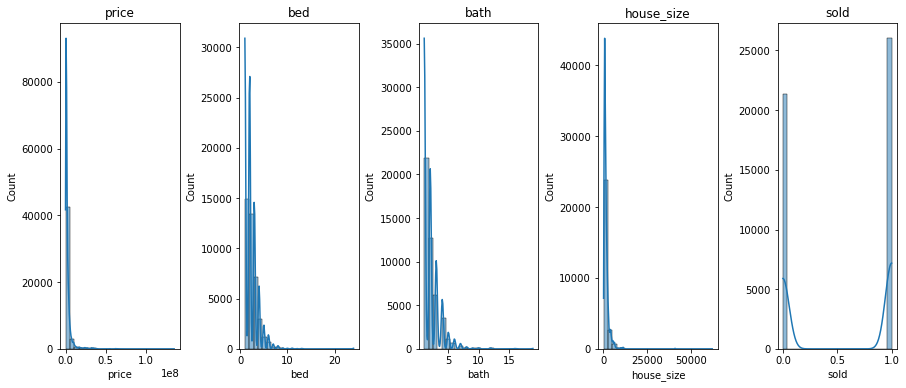

In [75]:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['price','bed','bath','house_size','sold']:
    n += 1
    plt.subplot(1,5,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df_ny[x], bins =25,kde=True)
    plt.title('{}'.format(x))
plt.show()

In [76]:
#Checking Qty of Apartments bigger then 5 bed

x= len(df_ny)

y = df_ny[df_ny["bed"]>5].shape[0]

z= y/x

print(x)
print(y)
print(z)


47362
1247
0.026329124614669987


In [77]:
#Remove Values bed > 5
df_ny= df_ny[df_ny["bed"]<6]


In [78]:
#Checking Qty apartments house size > 2000 fet square

x= len(df_ny)

y = df_ny[df_ny["house_size"]>2000].shape[0]

z= y/x

print(x)
print(y)
print(z)

39729
5574
0.14030053613229632


In [79]:
#Remove Values house size > 2000 fet
df_ny= df_ny[df_ny["house_size"]<2000]


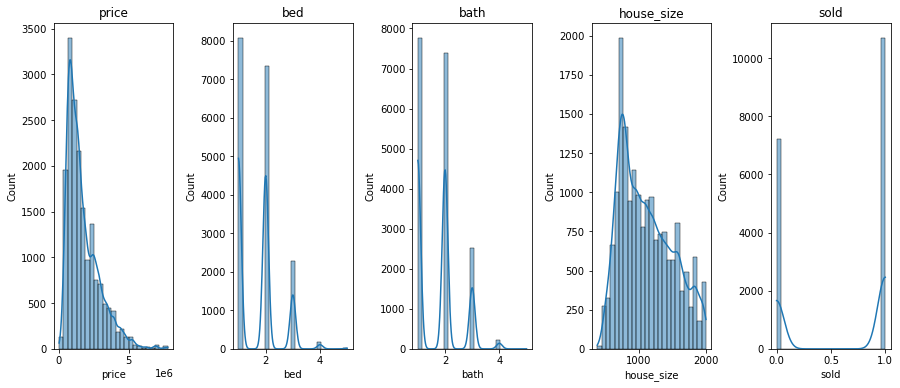

In [80]:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['price','bed','bath','house_size','sold']:
    n += 1
    plt.subplot(1,5,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(df_ny[x], bins =25,kde=True)
    plt.title('{}'.format(x))
plt.show()

In [81]:
correlation = df_ny.corr()

<AxesSubplot:>

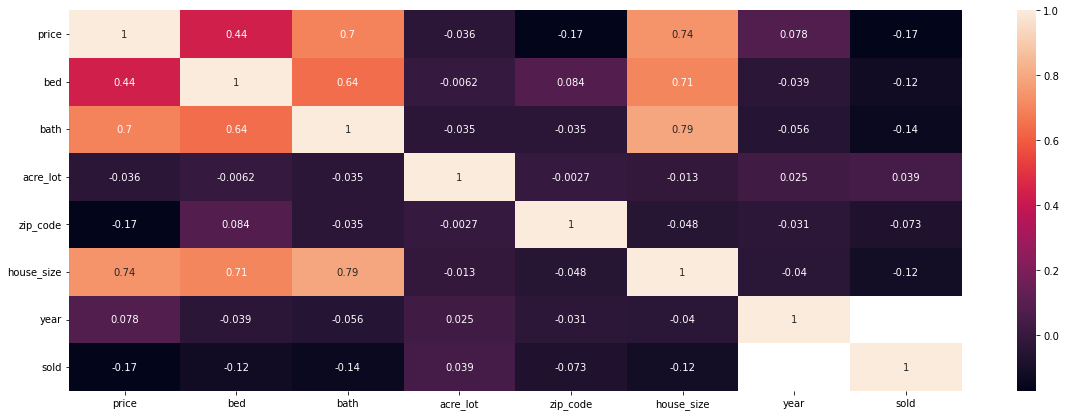

In [82]:
# correlation plot
%matplotlib inline
plt.figure(figsize=(20,7))
sns.heatmap(correlation,annot=True)

# Classification Algorithm

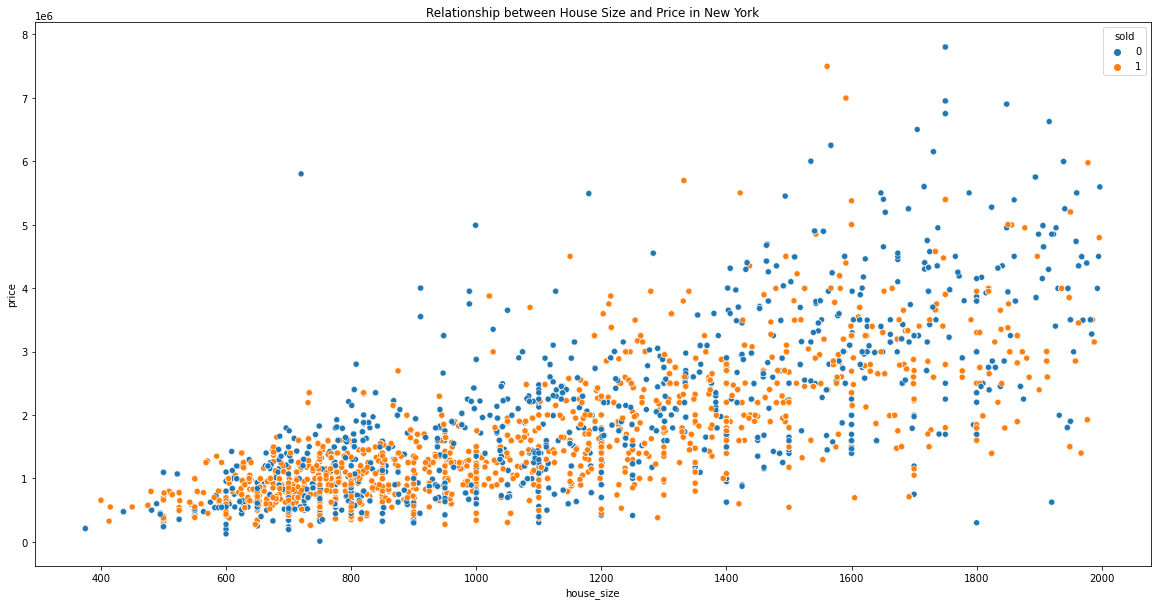

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize =(20,10))
sns.scatterplot(data=df_ny, x="house_size",y="price", hue="sold")
plt.title("Relationship between House Size and Price in New York")
plt.show()

Accuracy: 0.6469163405999627
Confusion Matrix:
[[ 432 1668]
 [ 227 3040]]
              precision    recall  f1-score   support

           0       0.66      0.21      0.31      2100
           1       0.65      0.93      0.76      3267

    accuracy                           0.65      5367
   macro avg       0.65      0.57      0.54      5367
weighted avg       0.65      0.65      0.59      5367



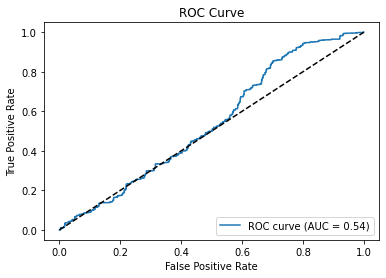

In [84]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Algorithm Classfication
X = df_ny[["price", "house_size"]]
y = df_ny["sold"]

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Create a logistic regression model and fit in to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

#Evaluate the model on the test data
y_pred = model.predict(X_test)

# Add predicted classification to the dataset
df_ny["predicted_sold"] = model.predict(X)

#Compute evaluation metrics
print("Accuracy:", model.score(X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Plot ROC curve and compute AUC score
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

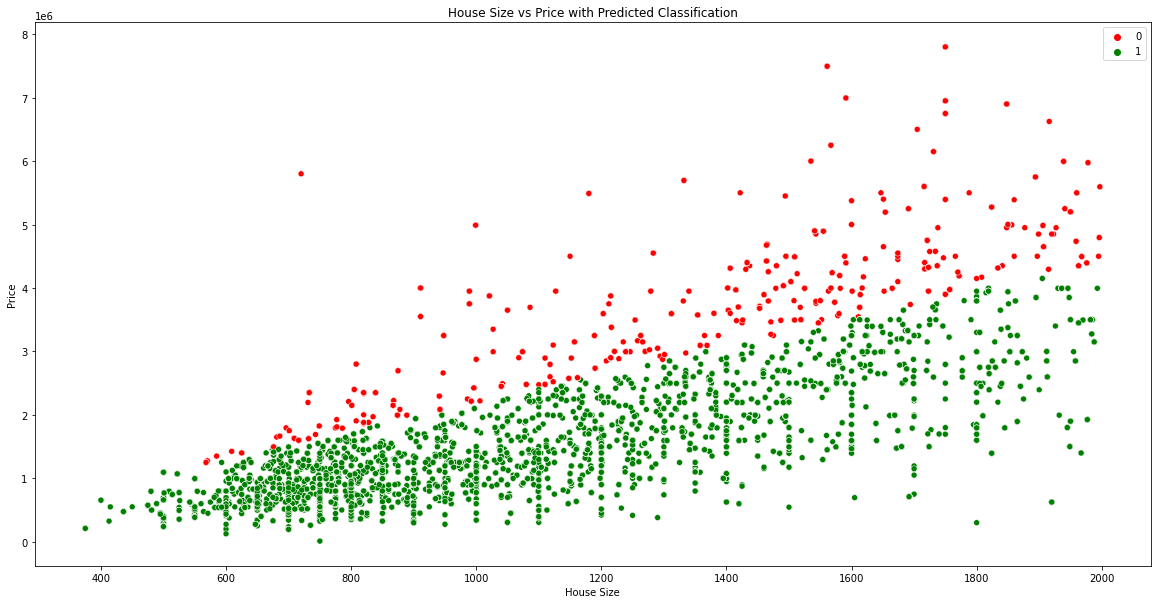

In [85]:
# Predict the classification for each data point in the filtered DataFrame
y_pred = model.predict(X)

# Plot a scatter plot of "house_size" vs "price", with color-coded points based on the predicted classification
plt.figure(figsize=(20, 10))
sns.scatterplot(data=X, x="house_size", y="price", hue=y_pred, palette=["red", "green"])

# Set title and axis labels
plt.title("House Size vs Price with Predicted Classification")
plt.xlabel("House Size")
plt.ylabel("Price")

# Show plot
plt.show()

In [86]:
# Get predicted classifications for the test data
y_pred = model.predict(X_test)

# Get the indices of unsold apartments
unsold_indices = (y_test == 0)

# Get the indices of unsold apartments that were incorrectly classified as sold
false_sold_indices = (y_pred[unsold_indices] == 1)

# Count the number of unsold apartments that were incorrectly classified as sold
num_false_sold = sum(false_sold_indices)

# Count the total number of unsold apartments
num_unsold = sum(unsold_indices)

# Count the number of unsold apartments that could be sold based on the classification method
num_unsold_could_sell = num_unsold - num_false_sold

# Create a table with the counts
counts_table = pd.DataFrame({"Count": [num_false_sold, num_unsold_could_sell]}, index=["Incorrectly Classified as Sold", "Could Be Sold"])
print(counts_table)

                                Count
Incorrectly Classified as Sold   1668
Could Be Sold                     432


In [87]:
df_ny.to_excel("df_ny.xlsx", index=False)

# Classification Algorithm - Including Feature Bed Qty


In [88]:
df_ny.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,year,sold,predicted_sold
465513,for_sale,895000.0,2.0,2.0,0.0,"440 E 56th St Unit 4G, New York, NY, 10022",440 E 56th St Unit 4G,New York,New York,10022.0,1425.0,NaT,NaN,0,1
465515,for_sale,985000.0,1.0,2.0,0.0,"55 Wall St Apt 626, New York, NY, 10005",55 Wall St Apt 626,New York,New York,10005.0,1166.0,2014-01-10,2014.0,1,1
465516,for_sale,810000.0,1.0,1.0,0.0,"304 E 65th St Apt 3C, New York, NY, 10065",304 E 65th St Apt 3C,New York,New York,10065.0,761.0,2020-08-18,2020.0,1,1
465608,for_sale,865000.0,1.0,1.0,0.0,"333 E 34th St Apt 3H, New York, NY, 10016",333 E 34th St Apt 3H,New York,New York,10016.0,715.0,2013-12-13,2013.0,1,1
465613,for_sale,760000.0,1.0,1.0,0.0,"35 Park Ave Apt 18F, New York, NY, 10016",35 Park Ave Apt 18F,New York,New York,10016.0,650.0,2012-09-13,2012.0,1,1


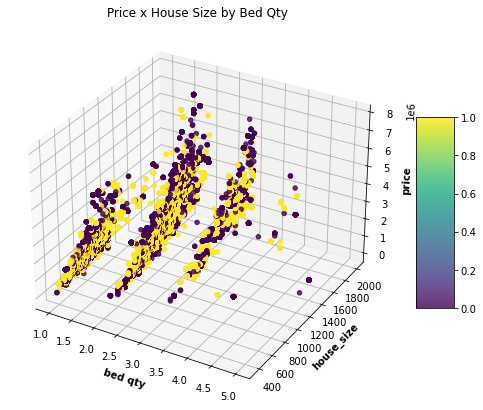

In [89]:
# Import libraries
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


# Creating dataset
z = df_ny.iloc[:, 1]
x = df_ny.iloc[:, 2]
y = df_ny.iloc[:, 10]
sold = df_ny.iloc[:, 13]  # Extracting "sold" column from DataFrame

# Creating figure
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

# Creating color map
my_cmap = plt.get_cmap("hsv")

# Creating plot

sctt = ax.scatter3D(x, y, z, alpha=0.8, c=sold  # Using "sold" column to set colors
                     )

plt.title("Price x House Size by Bed Qty")

ax.set_xlabel('bed qty', fontweight='bold')
ax.set_ylabel('house_size', fontweight='bold')
ax.set_zlabel('price', fontweight='bold')

fig.colorbar(sctt, ax=ax, shrink=0.5, aspect=5)

# show plot
# plt.show()

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


#Algorithm Classfication
X = df_ny[["price", "house_size","bed"]]
y = df_ny["sold"]

#Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Create a logistic regression model and fit in to the training data

model = LogisticRegression()
model.fit(X_train, y_train)

#Evaluate the model on the test data

score = model.score(X_test, y_test)

print("Accuracy:", score)

print("Confusion Matrix", model.coef_)

Accuracy: 0.6402086826905161
Confusion Matrix [[-4.23121782e-07  9.36766886e-04  1.28126105e-06]]


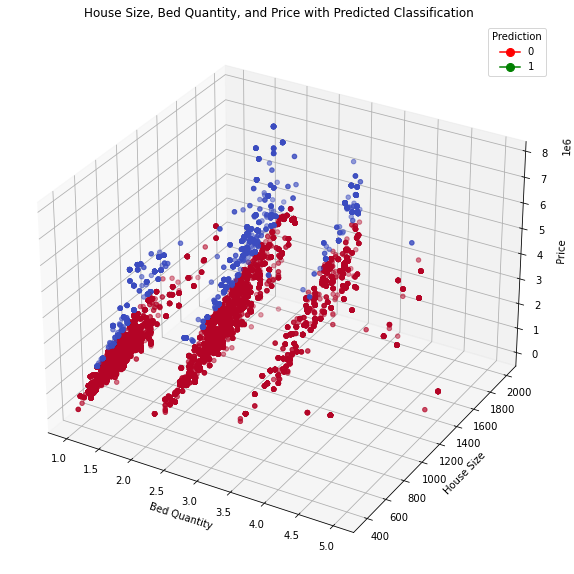

In [91]:
from mpl_toolkits.mplot3d import Axes3D

# Predict the classification for each data point in the filtered DataFrame
y_pred = model.predict(X)

# Create a 3D scatter plot of "house_size", "bed_qty", and "price", with color-coded points based on the predicted classification
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X["bed"], X["house_size"], X["price"], c=y_pred, cmap="coolwarm")

# Create a legend for the predicted classification
legend_handles = [plt.Line2D([], [], marker='o', markersize=8, color=c, label=str(i)) for i, c in enumerate(["red", "green"])]
ax.legend(handles=legend_handles, title="Prediction", loc="best")

# Set title and axis labels
ax.set_title("House Size, Bed Quantity, and Price with Predicted Classification")
ax.set_ylabel("House Size")
ax.set_xlabel("Bed Quantity")
ax.set_zlabel("Price")

# Show plot
plt.show()

Accuracy: 0.6370411775666107
Confusion Matrix:
[[ 421 1711]
 [ 237 2998]]
              precision    recall  f1-score   support

           0       0.64      0.20      0.30      2132
           1       0.64      0.93      0.75      3235

    accuracy                           0.64      5367
   macro avg       0.64      0.56      0.53      5367
weighted avg       0.64      0.64      0.57      5367



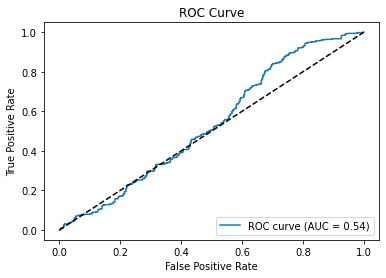

In [92]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#Algorithm Classfication
X = df_ny[["price", "house_size", "bed"]]
y = df_ny["sold"]

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Create a logistic regression model and fit in to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

#Evaluate the model on the test data
y_pred = model.predict(X_test)

#Compute evaluation metrics
print("Accuracy:", model.score(X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Plot ROC curve and compute AUC score
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Classification Algorithm - Reducing Data

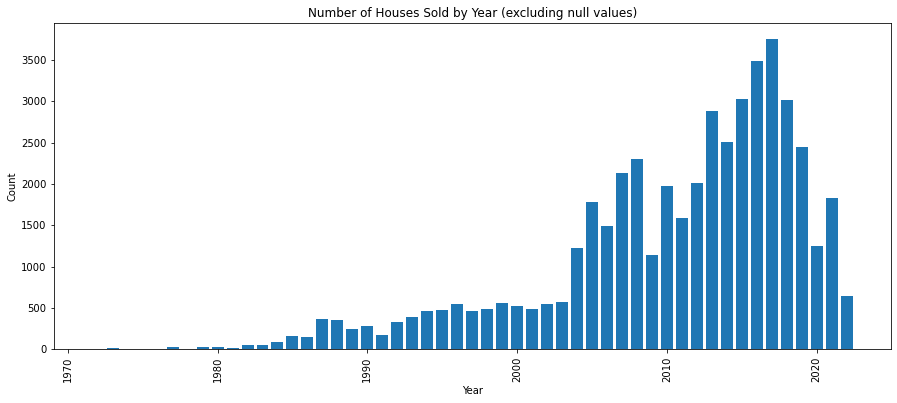

In [163]:
plt.figure(1, figsize = (15,6))

# Import libraries
import matplotlib.pyplot as plt

# Create Boolean mask for non-null "sold" values
not_null_mask = df_ny["sold"].notnull()

# Apply Boolean mask to DataFrame
df_ny_filtered = df_ny[not_null_mask]

# Group by "year" and count the number of rows in each group

year_count = df_ny_filtered.groupby("year").count()

year_total = df_ny_filtered.count()

# Create bar plot
plt.bar(year_count.index, year_count["sold"])

# Set title and axis labels
plt.title("Number of Houses Sold by Year (excluding null values)")
plt.xlabel("Year")
plt.ylabel("Count")

# rotate x labels

plt.xticks(rotation=90)

# Show plot
plt.show()

In [164]:
# Create Boolean mask for non-null "sold" values
not_null_mask = df_ny["sold"].notnull()

# Apply Boolean mask to DataFrame
df_ny_filtered = df_ny[not_null_mask]

# Group by "year" and count the number of rows in each group
year_count = df_ny_filtered.groupby("year").count()

# Calculate total count of non-null "sold" values
year_total = df_ny_filtered["sold"].count()

# Calculate percentage of total for each year
year_percent = year_count["sold"] / year_total * 100

# Calculate percent total and accumulated percent
year_percent_total = year_percent / year_percent.sum() * 100
year_accum_percent = year_percent_total.cumsum()

# Combine all columns into a DataFrame
year_table = pd.concat([year_count["sold"], year_percent, year_percent_total, year_accum_percent], axis=1)
year_table.columns = ["Count", "Percent of Total", "Percent Total", "Accumulated %"]

# Print the table
print(year_table)

        Count  Percent of Total  Percent Total  Accumulated %
year                                                         
1972.0      2          0.002367       0.004132       0.004132
1973.0     10          0.011833       0.020660       0.024792
1974.0      7          0.008283       0.014462       0.039254
1976.0      3          0.003550       0.006198       0.045452
1977.0     27          0.031948       0.055782       0.101233
1979.0     23          0.027215       0.047518       0.148751
1980.0     26          0.030765       0.053716       0.202467
1981.0     10          0.011833       0.020660       0.223127
1982.0     51          0.060346       0.105365       0.328492
1983.0     48          0.056797       0.099167       0.427659
1984.0     90          0.106494       0.185939       0.613598
1985.0    165          0.195239       0.340888       0.954486
1986.0    152          0.179856       0.314030       1.268516
1987.0    364          0.430708       0.752020       2.020536
1988.0  

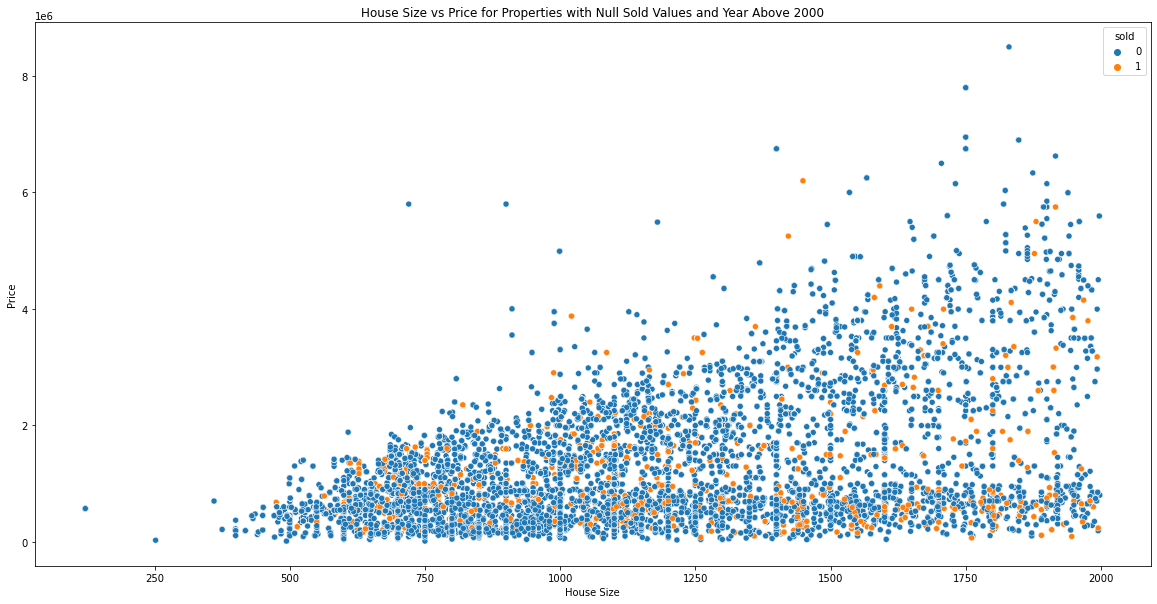

In [165]:
# Create a boolean mask to filter out the null values in the "sold" column and years below 2000
mask = (df_ny["year"].isnull()) | (df_ny["year"] >= 2020)

# Apply the boolean mask to the DataFrame to get a new filtered DataFrame
df_ny_filtered = df_ny[mask]

# Plot a scatterplot of "house_size" vs "price", with color-coded points based on "sold" status
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_ny_filtered, x="house_size", y="price", hue="sold")

# Set title and axis labels
plt.title("House Size vs Price for Properties with Null Sold Values and Year Above 2000")
plt.xlabel("House Size")
plt.ylabel("Price")

# Show plot
plt.show()

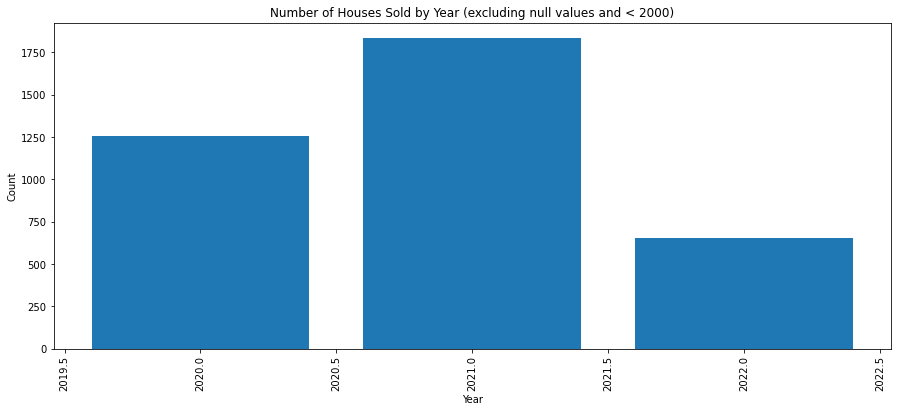

In [166]:
plt.figure(1, figsize = (15,6))

# Import libraries
import matplotlib.pyplot as plt


# Group by "year" and count the number of rows in each group

year_count = df_ny_filtered.groupby("year").count()

year_total = df_ny_filtered.count()

# Create bar plot
plt.bar(year_count.index, year_count["sold"])

# Set title and axis labels
plt.title("Number of Houses Sold by Year (excluding null values and < 2000)")
plt.xlabel("Year")
plt.ylabel("Count")

# rotate x labels

plt.xticks(rotation=90)

# Show plot
plt.show()

In [123]:
# Predict the classification for each data point in the filtered DataFrame
y_pred = model.predict(X)

# Plot a scatter plot of "house_size" vs "price", with color-coded points based on the predicted classification
plt.figure(figsize=(20, 10))
sns.scatterplot(data=X, x="house_size", y="price", hue=y_pred, palette=["red", "green"])

# Set title and axis labels
plt.title("House Size vs Price with Predicted Classification")
plt.xlabel("House Size")
plt.ylabel("Price")

# Show plot
plt.show()

ValueError: The palette list has the wrong number of colors.

<Figure size 1440x720 with 0 Axes>

In [119]:
# Get predicted classifications for the test data
y_pred = model.predict(X_test)

# Get the indices of unsold apartments
unsold_indices = (y_test == 0)

# Get the indices of unsold apartments that were incorrectly classified as sold
false_sold_indices = (y_pred[unsold_indices] == 1)

# Count the number of unsold apartments that were incorrectly classified as sold
num_false_sold = sum(false_sold_indices)

# Count the total number of unsold apartments
num_unsold = sum(unsold_indices)

# Count the number of unsold apartments that could be sold based on the classification method
num_unsold_could_sell = num_unsold - num_false_sold

# Create a table with the counts
counts_table = pd.DataFrame({"Count": [num_false_sold, num_unsold_could_sell]}, index=["Incorrectly Classified as Sold", "Could Be Sold"])
print(counts_table)

                                Count
Incorrectly Classified as Sold      0
Could Be Sold                   10817
